In [0]:
# make drive accesible
# !mkdir -p drive
# !google-drive-ocamlfuse drive

from google.colab import drive
drive.mount('/colab')

# check google colab dir
!ls "/colab/My Drive/colab"

In [0]:
# adding external libraries
!pip install -q keras
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
!pip install -q h5py
!pip install -q matplotlib

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 48, 48, 48)        480       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 48, 48, 48)        20784     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 24, 24, 48)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 96)        41568     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 24, 24, 96)        83040     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 12, 12, 192)       166080    
__________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


28709/28709 [==============================] - 18s 617us/step - loss: 1.7820 - acc: 0.2596
Epoch 3/60
28709/28709 [==============================] - 18s 623us/step - loss: 1.7009 - acc: 0.3193
Epoch 4/60
28709/28709 [==============================] - 18s 624us/step - loss: 1.5624 - acc: 0.3933
Epoch 5/60
28709/28709 [==============================] - 18s 625us/step - loss: 1.4609 - acc: 0.4387
Epoch 6/60
28709/28709 [==============================] - 18s 624us/step - loss: 1.3737 - acc: 0.4724
Epoch 7/60
28709/28709 [==============================] - 18s 625us/step - loss: 1.3079 - acc: 0.4973
Epoch 8/60
28709/28709 [==============================] - 18s 626us/step - loss: 1.2508 - acc: 0.5236
Epoch 9/60
28709/28709 [==============================] - 18s 626us/step - loss: 1.2069 - acc: 0.5429
Epoch 10/60
28709/28709 [==============================] - 18s 625us/step - loss: 1.1596 - acc: 0.5630
Epoch 11/60
28709/28709 [==============================] - 18s 626us/step - loss: 1.1160 - a

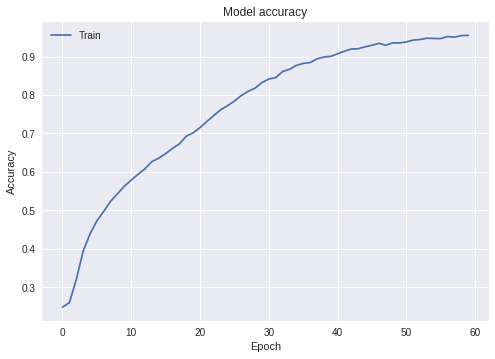

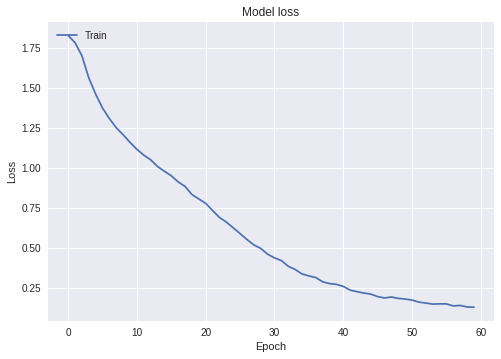

In [0]:
import cv2
import numpy as np
import glob
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop, Adam
from keras.losses import categorical_crossentropy
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
import h5py
import matplotlib.pyplot as plt

from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy

emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

epochs = 60
batch_size = 1000

def refine_data(data, label, classes):
	x = np.array(data)
	x = x.astype('float32')
	x /= 255
	x = np.expand_dims(x, axis=4)

	y = np.array(label, dtype="int64")
	y = np_utils.to_categorical(y, classes)

	return x, y

num_classes = len(emotions)

with h5py.File('/colab/My Drive/colab/training.h5', 'r') as hf:
  X_train = hf['X_train'][:]
  y_train = hf['y_train'][:]

with h5py.File('/colab/My Drive/colab/public_test.h5') as hf:
  X_test = hf['X_test'][:]
  y_test = hf['y_test'][:]

    
# refine data
X_train, y_train = refine_data(X_train, y_train, num_classes)
X_test, y_test = refine_data(X_test, y_test, num_classes)

input_shape = X_train[0].shape

stop_right_there = EarlyStopping(patience=2)

model = Sequential()

model.add(Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(Conv2D(48, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(2*48, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(2*48, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(4*48, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(4*48, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[stop_right_there])

# model.save('/colab/My Drive/colab/updated_architecture/model_50.h5')

score = model.evaluate(X_test, y_test, verbose=1)
print("test loss: ", score[0])
print("test accuracy: ", score[1] * 100)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


3589/3589 [==============================] - 2s 470us/step
test loss:  1.6864330698169019
test accuracy:  60.37893563832836
              precision    recall  f1-score   support

       Anger       0.48      0.55      0.52       467
     Disgust       0.81      0.46      0.59        56
        Fear       0.47      0.42      0.44       496
       Happy       0.76      0.82      0.79       895
         Sad       0.55      0.44      0.49       653
    Surprise       0.75      0.77      0.76       415
     Neutral       0.50      0.54      0.52       607

   micro avg       0.60      0.60      0.60      3589
   macro avg       0.62      0.57      0.59      3589
weighted avg       0.60      0.60      0.60      3589



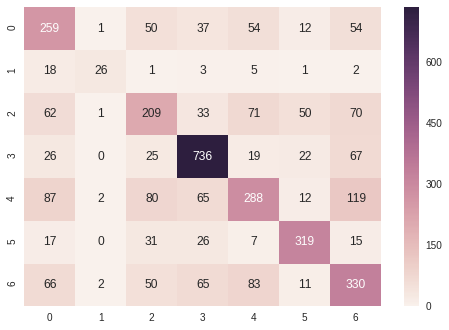

In [0]:
import cv2
import numpy as np
from keras.models import load_model
from keras.utils import np_utils
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import h5py
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

emotions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

model = load_model('/colab/My Drive/colab/updated_architecture/model_50.h5')

num_classes = len(emotions)

def refine_data(data, label, classes):
	x = np.array(data)
	x = x.astype('float32')
	x /= 255
	x = np.expand_dims(x, axis=4)

	y = np.array(label, dtype="int64")
	y = np_utils.to_categorical(y, classes)

	return x, y

with h5py.File('/colab/My Drive/colab/public_test.h5', 'r') as hf:
    X_test = hf['X_test'][:]
    y_test = hf['y_test'][:]
    
X_test, y_test = refine_data(X_test, y_test, num_classes)

score = model.evaluate(X_test, y_test, verbose=1)
print("test loss: ", score[0])
print("test accuracy: ", score[1] * 100)

y_pred = model.predict_classes(X_test)

p=model.predict_proba(X_test) # to predict probability
target_names = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

ax = sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1), y_pred), annot=True, fmt="d")
plt.show()